<a href="https://colab.research.google.com/github/Eshwar-Naidus/task-1/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Data Preprocessing Complete ---
Training set size: 120 samples
Test set size: 30 samples
-----------------------------------
Elbow method plot generated (see plot window).
Optimal K found: 2
-----------------------------------
--- Model Evaluation (K=2) ---
Accuracy: 100.00%

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

-----------------------------------
Decision boundary plot generated (see plot window).
--- Task 6 Complete ---


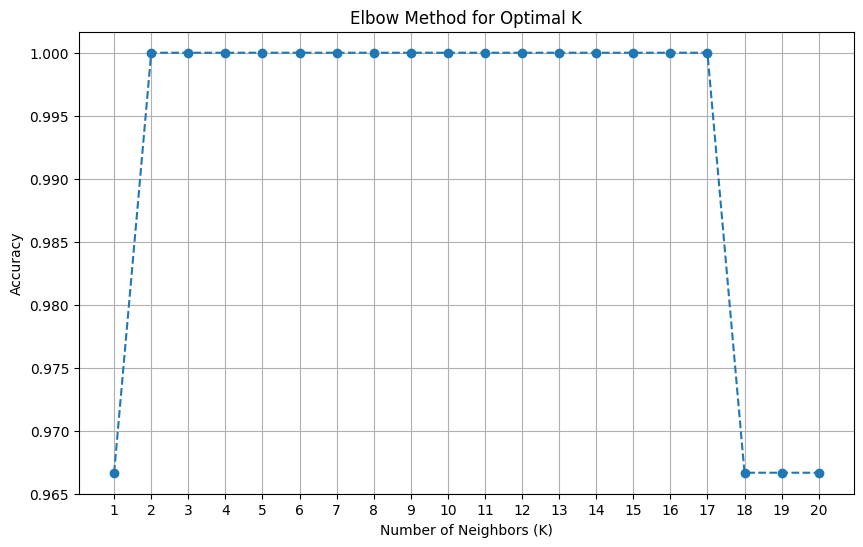

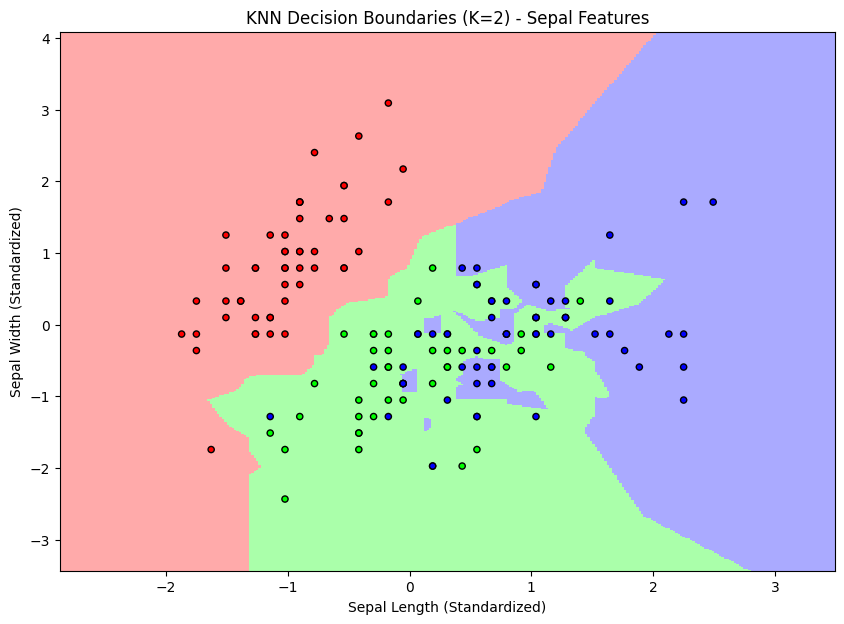

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# --- 1. Load Dataset ---
# Using the Iris dataset as suggested
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# --- 2. Normalize Features ---
# Normalization is critical for KNN [cite: 6]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("--- Data Preprocessing Complete ---")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print("-" * 35)

# --- 4. Experiment with K (Elbow Method) ---
# Experimenting with different K values is required
k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o', linestyle='dashed')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_range)
# plt.savefig('elbow_plot.png') # Optional: save the plot
print("Elbow method plot generated (see plot window).")


# Find the optimal K (K with the highest accuracy)
optimal_k = k_range[np.argmax(accuracies)]
print(f"Optimal K found: {optimal_k}")
print("-" * 35)


# --- 5. Train Final Model & Evaluate ---
# Using KNeighborsClassifier  with the optimal K
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

# Evaluation using accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_final)
cm = confusion_matrix(y_test, y_pred_final)
report = classification_report(y_test, y_pred_final, target_names=target_names)

print(f"--- Model Evaluation (K={optimal_k}) ---")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)
print("-" * 35)


# --- 6. Visualize Decision Boundaries ---
# Visualization is required
# We will use only the first two features (Sepal Length, Sepal Width) for 2D visualization

# Load data again, but only 2 features
X_viz = iris.data[:, :2]
y_viz = iris.target

# Scale these 2 features
scaler_viz = StandardScaler()
X_viz_scaled = scaler_viz.fit_transform(X_viz)

# Train a new KNN model *only* on these 2 features for visualization
knn_viz = KNeighborsClassifier(n_neighbors=optimal_k)
knn_viz.fit(X_viz_scaled, y_viz)

# Create a mesh grid to plot the boundaries
h = .02  # step size in the mesh
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X_viz_scaled[:, 0].min() - 1, X_viz_scaled[:, 0].max() + 1
y_min, y_max = X_viz_scaled[:, 1].min() - 1, X_viz_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict classifications for each point on the mesh grid
Z = knn_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot the training points
plt.scatter(X_viz_scaled[:, 0], X_viz_scaled[:, 1], c=y_viz, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.title(f'KNN Decision Boundaries (K={optimal_k}) - Sepal Features')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# plt.savefig('decision_boundaries.png') # Optional: save the plot

print("Decision boundary plot generated (see plot window).")
print("--- Task 6 Complete ---")

# Show all plots
plt.show()